In [18]:
from IPython.core.display import HTML
HTML("""
<style>


div.text_cell_render h2 { /*  Parts names nearer from text */
margin-bottom: -0.4em;
}


div.text_cell_render { /* Customize text cells */
font-family: 'Times New Roman';
font-size:1.2em;
line-height:1.4em;
padding-left:1em;
padding-right:1em;
}
</style>
""")

# Intro to ML

![mlvd](images/what-they-think.jpg)


* Машинное обучение — это подраздел искусственного интеллекта, в котором изучаются алгоритмы, способные обучаться без прямого программирования того, что нужно изучать.
* *Что значит обучение?*
    * говорят, что программа обучается на опыте **E**  относительно класса задач **T** в смысле меры качества $\mathcal{L}$, если при решении задачи **T** качество, измеряемое мерой $\mathcal{L}$, возрастает при демонстрации нового опыта **E**.
    
    *** T. Mitchell "Machine learning", 1997 ***

## Основные задачи **T** в машинном обучении

* *Обучение с учителем (Supervised learning)* - по заданному набору признаков наблюдаемого объекта необходимо спрогнозировать некоторую целевую переменную (label)  $f: X \rightarrow Y$. Опыт *E* представляется в виде множества пар признаков и целевых переменных: $D = \left\{ \left( x_i, y_i \right) \right\}_{i=1, \ldots, n}$

    В зависимости от типа целевой переменной можно выделить следующие задачи обучения с учиетелем,
    * continuous - регрессия, пример меры $\mathcal{L}(y, \hat{y}) = (y - \hat{y})^2$, $\hat{y}$ - оценка реального значения
    * categorical - классификация
    * ordinal - ранжирование
       

* *Обучение без учителя (Unsupervised learning)* - задача **T** нахождения скрытых зависимостей в неразмеченных (без целевой переменной, unlabeled) данных. Опыт **E** - множество признаков без целевой переменной $D = \left\{ x_i \right\}_{i=1, \ldots, n}$

    * кластеризация 
    * понижение размерности - уменьшить размерность признакового описания объекта с минимизацией потери информации
    * Matrix completion - рекомендательные системы (коллаборативная фильтрация)

* *Обучение с подкреплением (Reinforcement learning)* - агент учится оптимальному поведению при взаимодействии со средой (environment) на своих действиях и ответах от среды на эти действия

# Предиктивная модель

*Предиктивная модель* - это параметрическое семейство функций (семейство гипотез):

$$\large \mathcal{H} = \left\{ h\left(x, \theta\right) | \theta \in \Theta \right\}$$

* где
    * $\large h: X \times \Theta \rightarrow Y$    
    * $\large \Theta$ - множество параметров

# Алгоритм Обучения

*Алгоритм Обучения* - это отображение из набора данных в пространство гипотез:

$$\large \mathcal{M}: \left(X \times Y\right)^n \rightarrow \mathcal{H}$$

Обычно процесс обучения с учителем состоит из двух шагов:
1. Обучение: $\large h = \mathcal{M}\left(D\right)$
2. Применение  $\large \hat{y} = h\left(x\right)$

# Принцип минимизации эмпирического риска

Определим функцию потерь:
$$\large L: Y \times Y \rightarrow \mathbb{R}$$
которая измеряет то, насколько хорошо/плохо выбранная гипотеза предсказала $\large \hat {y}$ реальное значение $\large y$.

Риском гипотезы $\large h$ называют ожидаемое значение функции стоимости $\large L$:
$$\large \begin{array}{rcl}Q\left(h\right) &=& \text{E}_{x, y \sim P\left(x, y\right)}\left[L\left(h\left(x\right), y\right)\right] \\
&=& \int L\left(h\left(x\right), y\right) d P\left(x, y\right)
\end{array}$$

Проблема: распределение $\large P\left(x, y\right)$ неизвестно, поэтому интерграл не посчитать.


Но мы можем аппроксимировать риск гипотезы эмпирическим риском:

$$\large Q_{\text{emp}}\left(h\right) = \frac{1}{n} \sum_{i=1}^n L\left(h\left(x_i\right), y_i\right)$$

И, согласно принципу, минимизировать $\large Q_{\text{emp}}$:

$$\large \hat{h} = \arg \min_{h \in \mathcal{H}} Q_{\text{emp}}\left(h\right)$$

Примеры функций потерь:
* классификация: $\large L\left(\hat{y}, y\right) = \text{I}\left[\hat{y} = y\right]$
* регрессия: $\large L\left(\hat{y}, y\right) = \left(\hat{y} - y\right)^2$

## Обобщающая способность и переобучение

Решения, найденные с помощью принципа минимизации эмпирического риска сколнны к *переобучению*.

* Мы говорим, что модель обладает *обобщающей способностью*, тогда, когда ошибка на новом (тестовом) наборе данных (взятом из того же распределения $\large P\left(x, y\right)$) мала, или же предсказуема.
* Переобученная модель не обладает обобщающей способностью, т.е. на обучающем наборе данных ошибка мала, а на тестовом наборе данных ошибка существенно больше.

# Линейная регрессия

Ограничим пространство гипотез линейными функциями от $\large \left(m + 1\right)$-размерного аргумента, будем считать, что нулевой признак для всех объектов равен единице ($\large x_0 = 1$):
$$\large \begin{array}{rcl} \forall h \in \mathcal{H}, h\left(\vec{x}\right) &=& w_0 x_0 + w_1 x_1 + \cdots + w_m x_m \\
&=& \sum_{i=0}^m w_i x_i \\
&=& \vec{x}^T \vec{w}
\end{array}$$
где:
* $\large \vec{x} \in \mathbb{R}^{m + 1}$
* $\large \vec{w}$ - вектор параметров модели

Будем оптимизировать эмпирический риск от среднеквадратической функции потерь (Mean Square Error):
$$\large \begin{array}{rcl}\mathcal{L}\left(X, \vec{y}, \vec{w} \right) &=& \frac{1}{2n} \sum_{i=1}^n \left(y_i - \vec{x}_i^T \vec{w}_i\right)^2 \\
&=& \frac{1}{2n} \left\| \vec{y} - X \vec{w} \right\|_2^2 \\
&=& \frac{1}{2n} \left(\vec{y} - X \vec{w}\right)^T \left(\vec{y} - X \vec{w}\right)
\end{array}$$
где:
* $\large \vec{w} \in \mathbb{R}^{m + 1}$
* $\large \vec{y} \in \mathbb{R}^n$
* $\large X$ is $\large n \times m$ матрица, где $i$-ая строка - вектор признаков $i$-го объекта

Используя факт, что квадратичная функция - выпуклая функция, найдём решение в явном виде, найдя производную функции потерь:
    
$$\large \begin{array}{rcl} \frac{\partial \mathcal{L}}{\partial \vec{w}} &=& \frac{\partial}{\partial \vec{w}} \frac{1}{2n} \left( \vec{y}^T \vec{y} -2\vec{y}^T X \vec{w} + \vec{w}^T X^T X \vec{w}\right) \\
&=& \frac{1}{2n} \left(-2 X^T \vec{y} + 2X^T X \vec{w}\right)
\end{array}$$

и приравняв её к нулю:
$$\large \begin{array}{rcl} \frac{\partial \mathcal{L}}{\partial \vec{w}} = 0 &\Leftrightarrow& \frac{1}{2n} \left(-2 X^T \vec{y} + 2X^T X \vec{w}\right) = 0 \\
&\Leftrightarrow& -X^T \vec{y} + X^T X \vec{w} = 0 \\
&\Leftrightarrow& X^T X \vec{w} = X^T \vec{y} \\
&\Leftrightarrow& \vec{w} = \left(X^T X\right)^{-1} X^T \vec{y}
\end{array}$$

Алгоритм машинного обучения готов!

In [19]:
# plot graphics in the notebook 
%matplotlib inline
# support operations for large, multi-dimensional arrays and matrices
import numpy as np
# make experiments reproducible
np.random.seed(12345)
# extension of main plotting library matplotlib
import seaborn as sns
# set style
sns.set_style("dark")
# main library for plotting
import matplotlib.pyplot as plt
# set default size of plots
plt.rcParams['figure.figsize'] = 12, 8

In [20]:
def generate_wave_set(n_support=1000, n_train=25, std=0.3):
    data = {}
    # create 1000 points uniformly distibuted in closed intervl from 0 to 2*pi
    # it is some kind of resolution for sampling
    data['support'] = np.linspace(0, 2*np.pi, num=n_support)
    # calculate sine values
    data['values'] = np.sin(data['support']) + 1
    # choose n_train random vakues from support (with replacement) and sort them ascending
    data['x_train'] = np.sort(np.random.choice(data['support'], size=n_train, replace=True))
    # calculate sine for each of samplesd point
    data['y_train'] = np.sin(data['x_train']) + 1 + np.random.normal(0, std, size=data['x_train'].shape[0])
    return data

Shape of X is (25,)
Head of X is [0.48428956 0.57234221 0.66039485 0.74215802 0.81134225 1.30821075
 1.67928977 1.79250031 1.98118456 2.2453425 ]


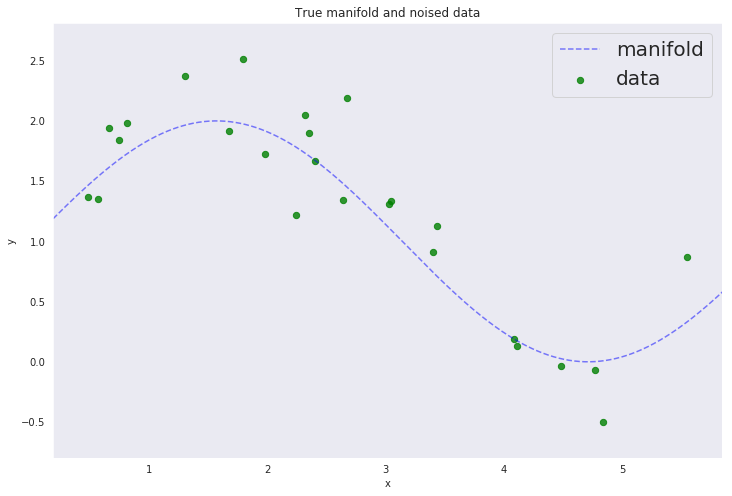

In [21]:
# sample 25 points from 1000 available from noised sin manifold 
data = generate_wave_set(1000, 25)

print('Shape of X is', data['x_train'].shape)
print('Head of X is', data['x_train'][:10])

margin = 0.3
plt.plot(data['support'], data['values'], 'b--', alpha=0.5, label='manifold')
plt.scatter(data['x_train'], data['y_train'], 40, 'g', 'o', alpha=0.8, label='data')
plt.xlim(data['x_train'].min() - margin, data['x_train'].max() + margin)
plt.ylim(data['y_train'].min() - margin, data['y_train'].max() + margin)
plt.legend(loc='upper right', prop={'size': 20})
plt.title('True manifold and noised data')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Пример работы линейной регрессии на синтетических данных

![mlvd](images/plots/lr_wave_set.png)

Top rows of X
[[1.         0.48428956]
 [1.         0.57234221]
 [1.         0.66039485]
 [1.         0.74215802]
 [1.         0.81134225]]
Fitted params
[ 2.42648096 -0.42818065]


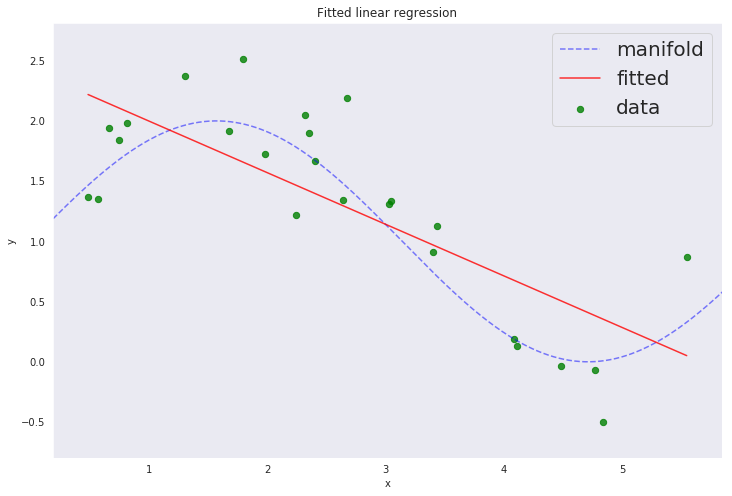

In [24]:
# add column of ones to the first position
X = np.array([np.ones(data['x_train'].shape[0]), data['x_train']]).T
print('Top rows of X')
print(X[:5, :])
# linear algebra magic of numpy
w = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), data['y_train'])
print('Fitted params')
print(w)
y_hat = np.dot(w, X.T)

margin = 0.3
plt.plot(data['support'], data['values'], 'b--', alpha=0.5, label='manifold')
plt.scatter(data['x_train'], data['y_train'], 40, 'g', 'o', alpha=0.8, label='data')

plt.plot(data['x_train'], y_hat, 'r', alpha=0.8, label='fitted')

plt.xlim(data['x_train'].min() - margin, data['x_train'].max() + margin)
plt.ylim(data['y_train'].min() - margin, data['y_train'].max() + margin)
plt.legend(loc='upper right', prop={'size': 20})
plt.title('Fitted linear regression')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

![mlvd](images/plots/lr_wave_set_fit.png)

In [25]:
np.mean((data['y_train'] - y_hat)**2)

0.26704367617359787

Can we do better?

# Полиномиальная регрессия

Давайте теперь расширим пространство гипотез до всех полиномов степени $\large p$. Тогда, когда количество признаков равно одному $\large m = 1$, пространство гипотез будет выглядеть следующим образом:
$$\large \begin{array}{rcl} \forall h \in \mathcal{H}, h\left(x\right) &=& w_0 + w_1 x + w_1 x^2 + \cdots + w_n x^p \\
&=& \sum_{i=0}^p w_i x^i
\end{array}$$

Мы не вышли за рамки линейной модели, а просто расширили пространство признаков.

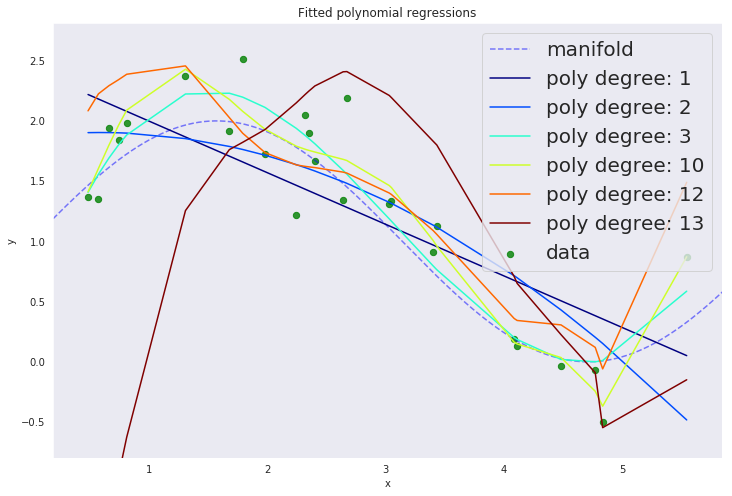

In [78]:
# define list with degrees of polynomials to investigate
degree_list = [1, 2, 3, 10, 12, 13]
# get color palette
cmap = plt.get_cmap('jet')
# compute individual color for each curve
colors = [cmap(i) for i in np.linspace(0, 1, len(degree_list))]

margin = 0.3
plt.plot(data['support'], data['values'], 'b--', alpha=0.5, label='manifold')
plt.scatter(data['x_train'], data['y_train'], 40, 'g', 'o', alpha=0.8, label='data')

# save weights of all fitted polynomial regressions
w_list = []
err = []
for ix, degree in enumerate(degree_list):
    
    # list with polynomial features for each degree
    dlist = [np.ones(data['x_train'].shape[0])] + \
            list(map(lambda n: data['x_train']**n, range(1, degree + 1)))
    X = np.array(dlist).T
    w = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), data['y_train'])
    w_list.append((degree, w))
    y_hat = np.dot(w, X.T)
    err.append(np.mean((data['y_train'] - y_hat)**2))
    plt.plot(data['x_train'], y_hat, color=colors[ix], label='poly degree: %i' % degree)

plt.xlim(data['x_train'].min() - margin, data['x_train'].max() + margin)
plt.ylim(data['y_train'].min() - margin, data['y_train'].max() + margin)
plt.legend(loc='upper right', prop={'size': 20})
plt.title('Fitted polynomial regressions')
plt.xlabel('x')
plt.ylabel('y')
plt.show() 

Попробуем отрисовать графики нескольких полиномов разных степеней.
![mlvd](images/plots/lr_wave_set_polyfeat.png)

In [79]:
for p, e in zip(degree_list, err):
    print(p, e)

1 0.26704367617359787
2 0.22495097556913016
3 0.08217051592252778
10 0.05450598799392367
12 0.15748919220976476
13 2.372435489391954


Посмотрим на амплитуду параметров полиномиальной регрессии

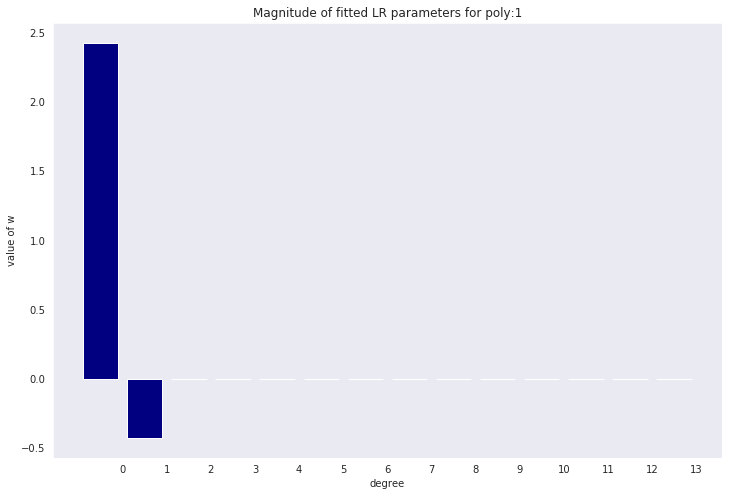

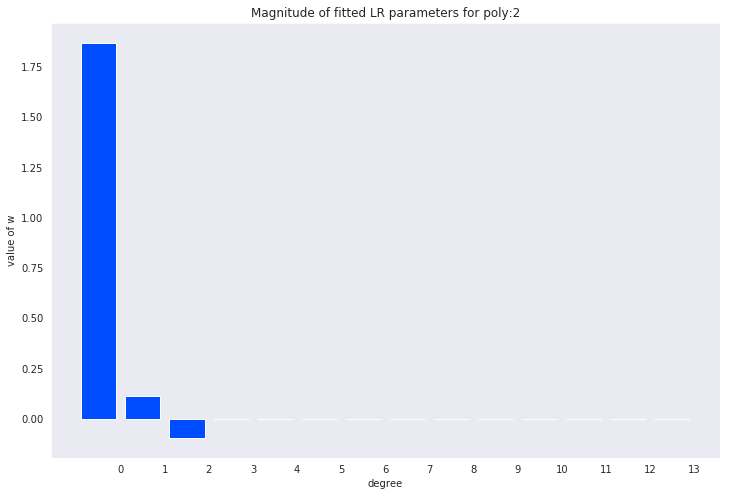

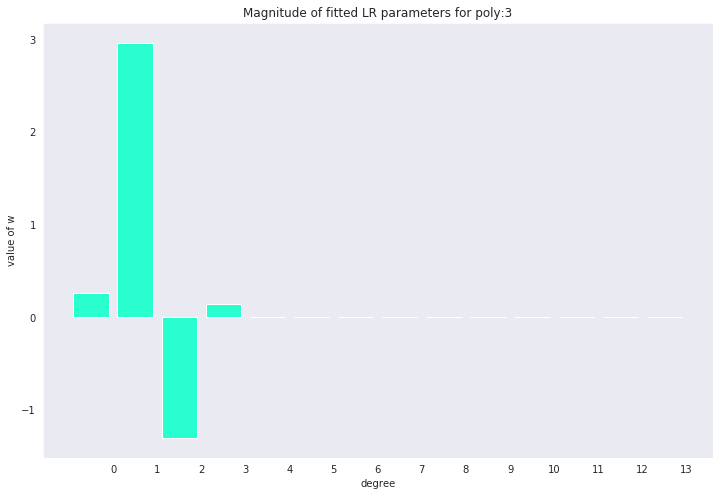

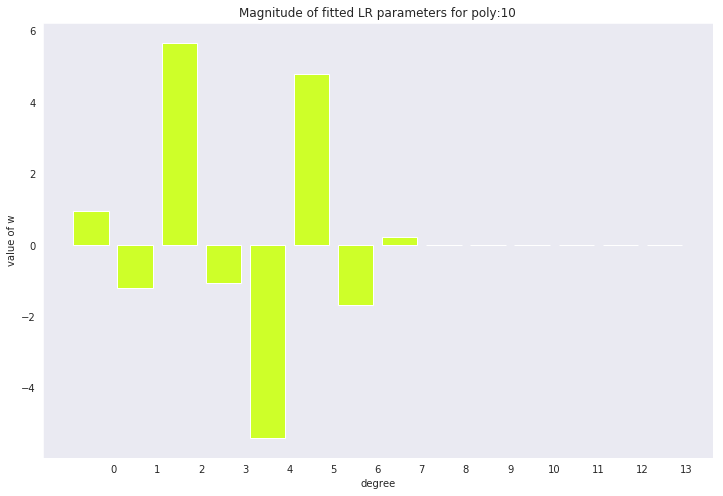

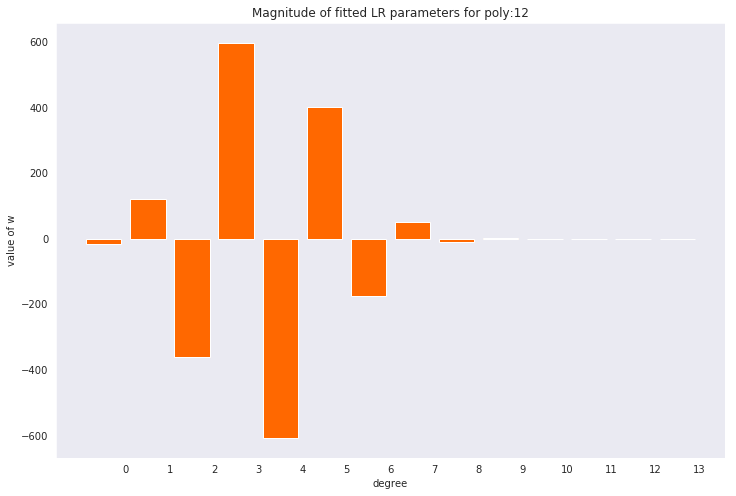

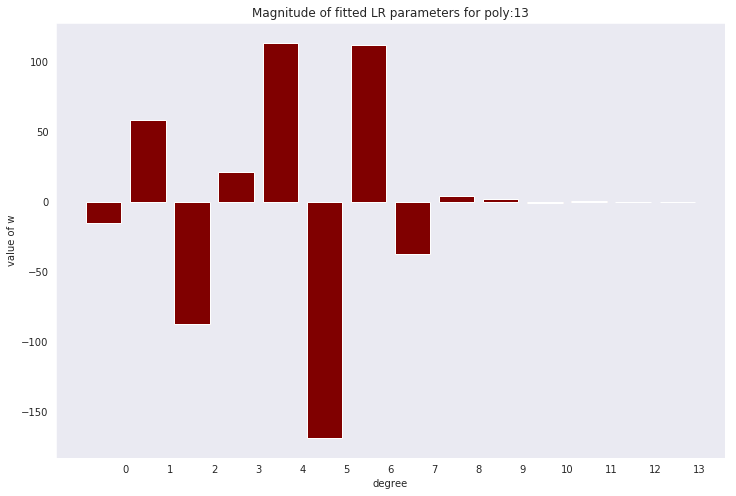

In [81]:
for ix, t in enumerate(w_list):
    degree, w = t
    fig, ax = plt.subplots()
    plt.bar(range(max(degree_list) + 1), np.hstack((w, [0]*(max(degree_list) - w.shape[0] + 1))), color=colors[ix])
    plt.title('Magnitude of fitted LR parameters for poly:%i' % degree)
    plt.xlabel('degree')
    plt.ylabel('value of w')
    ax.set_xticks(np.array(range(max(degree_list) + 1)) + 0.5)
    ax.set_xticklabels(range(max(degree_list) + 1))
    plt.show()

![mlvd](images/plots/lr_polyfeat_coeffs_p1.png)

![mlvd](images/plots/lr_polyfeat_coeffs_p2.png)

![mlvd](images/plots/lr_polyfeat_coeffs_p10.png)

![mlvd](images/plots/lr_polyfeat_coeffs_p12.png)

# Регуляризация

Регуляризация — это способ уменьшить сложность модели чтобы предотвратить переобучение или исправить некорректно поставленную задачу. Обычно это достигается добавлением некоторой априорной информации к условию задачи:

$$\large \mathcal{L}_{reg} \left(X, \vec{y}, \vec{w}\right) = \mathcal{L}\left(X, \vec{y}, \vec{w}\right) + \lambda R\left(\vec{w}\right)$$
где:
* $\large \lambda$ - параметр регуляризации

# L2 регуляризация

Добавив ограничение на L2 норму вектора параметров:
$$\large R\left(\vec{w}\right) = \frac{1}{2} \left\| \vec{w} \right\|_2^2 = \frac{1}{2} \sum_{j=1}^m w_j^2 = \frac{1}{2} \vec{w}^T \vec{w}$$
Новая функция стоимости примет вид:
$$\large \mathcal{L}\left(X, \vec{y}, \vec{w} \right) = \frac{1}{2} \left(\vec{y} - X \vec{w}\right)^T \left(\vec{y} - X \vec{w}\right) + \frac{\lambda}{2} \vec{w}^T \vec{w}$$

 Вычислим производную по параметрам $\large \vec{w}$:
$$\large \begin{array}{rcl}\Large \frac{\partial \mathcal{L}}{\partial \vec{w}} &=& \frac{\partial}{\partial \vec{w}} \left(\frac{1}{2} \left(\vec{y} - X \vec{w}\right)^T \left(\vec{y} - X \vec{w}\right) + \frac{\lambda}{2} \vec{w}^T \vec{w}\right) \\
&=& \frac{\partial}{\partial \vec{w}}\left( \frac{1}{2} \left( \vec{y}^T \vec{y} -2\vec{y}^T X \vec{w} + \vec{w}^T X^T X \vec{w}\right) + \frac{\lambda}{2} \vec{w}^T \vec{w} \right) \\
&=& -X^T \vec{y} + X^T X \vec{w} + \lambda \vec{w}
\end{array}$$
Найдём решение в явном виде:
$$\large \begin{array}{rcl} \frac{\partial \mathcal{L}}{\partial \vec{w}} = 0 &\Leftrightarrow& -X^T \vec{y} + X^T X \vec{w} + \lambda \vec{w} = 0 \\
&\Leftrightarrow& X^T X \vec{w} + \lambda \vec{w} = X^T \vec{y} \\
&\Leftrightarrow& \left(X^T X + \lambda E\right) \vec{w} = X^T \vec{y} \\
&\Leftrightarrow& \vec{w} = \left(X^T X + \lambda E\right)^{-1} X^T \vec{y}
\end{array}$$

**Сингулярная матрица превращается в несингулярную путём добавления диагональной матрицы**
![mlvd](images/plots/lr_ridge_regression.png)

In [97]:
# define regularization parameter
lmbd = 0.1

degree_list = [1, 2, 3, 10, 12, 13]
cmap = plt.get_cmap('jet')
colors = [cmap(i) for i in np.linspace(0, 1, len(degree_list))]

margin = 0.3
plt.plot(data['support'], data['values'], 'b--', alpha=0.5, label='manifold')
plt.scatter(data['x_train'], data['y_train'], 40, 'g', 'o', alpha=0.8, label='data')

w_list_l2 = []
err = []
for ix, degree in enumerate(degree_list):
    dlist = [[1]*data['x_train'].shape[0]] + list(map(lambda n: data['x_train']**n, range(1, degree + 1)))
    X = np.array(dlist).T
    w = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X) + lmbd*np.eye(X.shape[1])), X.T), data['y_train'])
    w_list_l2.append((degree, w))
    y_hat = np.dot(w, X.T)
    plt.plot(data['x_train'], y_hat, color=colors[ix], label='poly degree: %i' % degree)
    err.append(np.mean((data['y_train'] - y_hat)**2))

plt.xlim(data['x_train'].min() - margin, data['x_train'].max() + margin)
plt.ylim(data['y_train'].min() - margin, data['y_train'].max() + margin)
plt.legend(loc='upper right', prop={'size': 20})
plt.title('Fitted polynomial regressions with L2 reg')
plt.xlabel('x')
plt.ylabel('y')
plt.show() 

![mlvd](images/plots/lr_wave_set_polyfeat_l2.png)

In [87]:
for p, e in zip(degree_list, err):
    print(p, e)

1 0.2674811533072718
2 0.2254674044722742
3 0.08803220241719992
10 0.058338547358307145
12 0.05588901504212191
13 0.05611802303768246


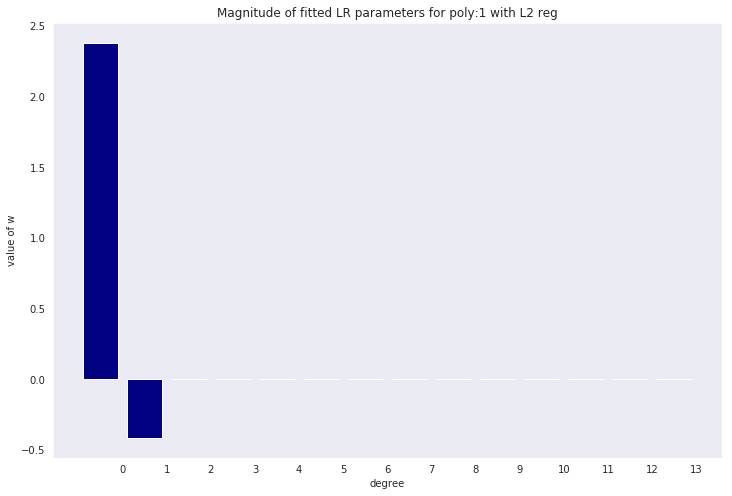

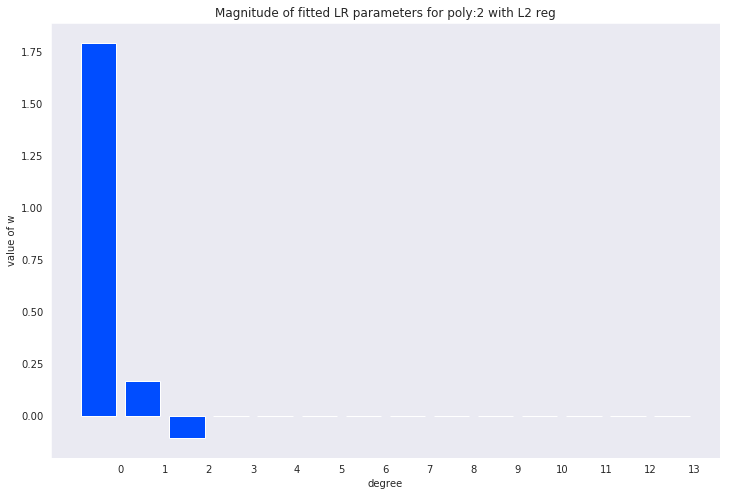

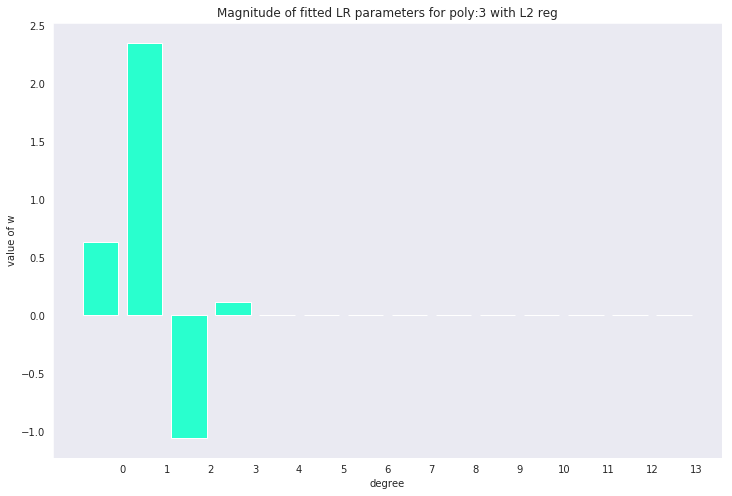

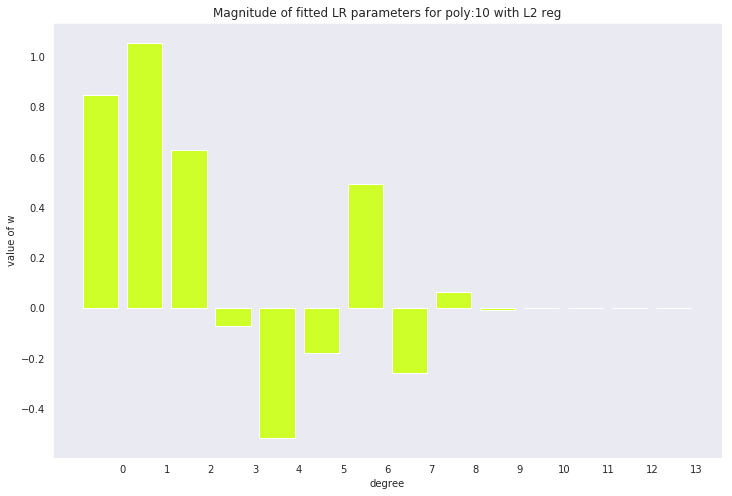

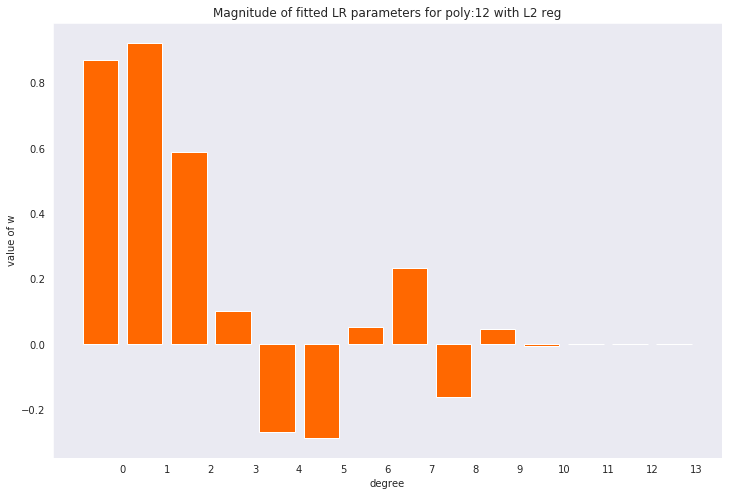

In [88]:
for ix, t in enumerate(w_list_l2):
    degree, w = t
    fig, ax = plt.subplots()
    plt.bar(range(max(degree_list) + 1), np.hstack((w, [0]*(max(degree_list) - w.shape[0] + 1))), color=colors[ix])
    plt.title('Magnitude of fitted LR parameters for poly:%i with L2 reg' % degree)
    plt.xlabel('degree')
    plt.ylabel('value of w')
    ax.set_xticks(np.array(range(max(degree_list) + 1)) + 0.5)
    ax.set_xticklabels(range(max(degree_list) + 1))
    plt.show()

![mlvd](images/plots/lr_polyfeat_coeffs_p1_l2.png)

![mlvd](images/plots/lr_polyfeat_coeffs_p2_l2.png)

![mlvd](images/plots/lr_polyfeat_coeffs_p12_l2.png)

# L1 регуляризация

 Попробуем теперь ограничить вектор параметров модели, используя L1 норму:
$$\large R\left(\vec{w}\right) = \left\| \vec{w} \right\|_1 = \sum_{j=1}^m \left| w_j \right|$$
 Тогда задача примет вид:
$$\large \mathcal{L}\left(X, \vec{y}, \vec{w} \right) = \frac{1}{2n} \sum_{i=1}^n \left(\vec{x_i}^T \vec{w} - y_i\right)^2 + \lambda \sum_{j=1}^m \left| w_j \right|$$
Посчитаем производную по параметрам модели (небольшой чит с производной по модулю):
$$\large \frac{\partial \mathcal{L}}{\partial w_j} = \frac{1}{n}\sum_{i=1}^n \left(\vec{x_i}^T \vec{w} - y_i\right) \vec{x_i} + \lambda \text{sign}(\vec{w})$$

Заметим, что такая задача не имеет решения в явном виде

### Метод градиентного спуска
 Для поиска хорошего приближенного решения мы воспользуемся методом градиентного спуска
 
 $$\large \vec{w}_{\text{new}} := \vec{w} - \alpha \frac{\partial \mathcal{L}}{\partial \vec{w}}$$
where:
* $\large \alpha$ - параметр, отвечающий за скорость спуска, его в машинном обучении называют скоростью обучения (learning rate). 

In [96]:
lmbd = 1
degree = 13
dlist = [[1]*data['x_train'].shape[0]] + list(map(lambda n: data['x_train']**n, range(1, degree + 1)))
X = np.array(dlist).T

# define MSE function to evaluate model
# we expect that durint training process this value will be decreasing
def mse(u, v):
    return ((u - v)**2).sum()/u.shape[0]

# initial weights of the model
w = np.array([-1.0] * X.shape[1])
# maximim number of iterations
n_iter = 20
# alpha or learning rate
lr = 0.00000001
# we will keep all MSE values to plot graph
loss = []
for ix in range(n_iter):
    w -= lr*(np.dot(np.dot(X, w) - data['y_train'], X)/X.shape[0] + lmbd*np.sign(w))
    y_hat = np.dot(X, w)
    loss.append(mse(data['y_train'], y_hat))
    print(loss[-1])

1.305123095804747e+38
1.2197910239760616e+58
1.1400381672468151e+78
1.0654997431797661e+98
9.958348196866645e+117
9.307247556352144e+137
8.698717434130203e+157
8.129974467821906e+177
7.598417277942669e+197
7.101614569425045e+217
6.637294011092426e+237
6.203331842219369e+257
5.797743158639911e+277
5.418672833973339e+297
inf
inf
inf
inf
inf
inf


Применим метод градиентного спуска и пронаблюдаем, как изменяется ошибка

```
1.305123095804747e+38
1.2197910239760616e+58
1.1400381672468151e+78
1.0654997431797661e+98
9.958348196866645e+117
9.307247556352144e+137
8.698717434130203e+157
8.129974467821906e+177
7.598417277942669e+197
7.101614569425045e+217
6.637294011092426e+237
6.203331842219369e+257
5.797743158639911e+277
5.418672833973339e+297
inf
inf
inf
inf
inf
inf
```
итеративынй процесс расходится. Причина в том, что каждый признак именяется в разных масштабах.

## Нормализация признаков 

Чтобы добиться сходимости метода градиентного спуска, необходимо либо уменьшать `learning rate`, либо привести все признаки к одному масштабу. Вычислим мат.ожидание и дисперсию каждого признака

$$\large \begin{array}{rcl} \overline{\mu}_{\cdot j} &=& \frac{1}{n} \sum_{i=1}^n x_{ij} \\
\overline{\sigma}_{\cdot j} &=& \sqrt{\frac{1}{n} \sum_{i=1}^n \left( x_{ij} - \overline{\mu}_{\cdot j} \right)}
\end{array}$$
И применим преобразование:
$$\large \vec{x}_{\text{new}} = \frac{\vec{x} - \overline{\mu}}{\overline{\sigma}}$$

Распределение каждого признака теперь имеет нулевое матожидание и единичную дисперсию.

X mean:
[1.00000000e+00 2.61717625e+00 8.89178866e+00 3.46858633e+01
 1.47337824e+02 6.62964718e+02 3.10664370e+03 1.49946179e+04
 7.40097896e+04 3.71757450e+05 1.89408958e+06 9.76488362e+06
 5.08473839e+07 2.67042329e+08]
X std
[0.00000000e+00 1.42904764e+00 8.26280332e+00 4.36295151e+01
 2.28694895e+02 1.20605446e+03 6.41842261e+03 3.44672461e+04
 1.86543640e+05 1.01602565e+06 5.56120143e+06 3.05530627e+07
 1.68325268e+08 9.29250585e+08]


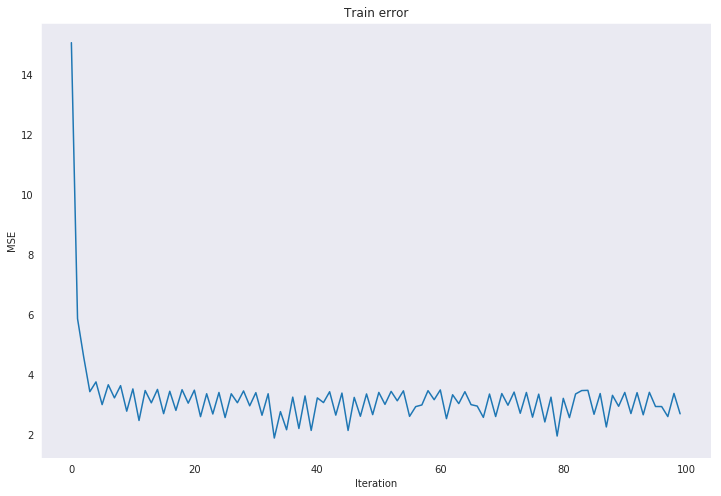

In [95]:
lmbd = 1
degree = 13
dlist = [[1]*data['x_train'].shape[0]] + list(map(lambda n: data['x_train']**n, range(1, degree + 1)))
X = np.array(dlist).T
# compute sample mean
x_mean = X.mean(axis=0)
print('X mean:')
print(x_mean)
# compute sample std
x_std = X.std(axis=0)
print('X std')
print(x_std)
# apply transformation
X = (X - x_mean)/x_std
# fix first column with ones
X[:, 0] = 1.0

def mse(u, v):
    return ((u - v)**2).sum()/u.shape[0]

w = np.array([-1.0] * X.shape[1])
n_iter = 100
lr = 0.1
loss = []
for ix in range(n_iter):
    w -= lr*(np.dot(np.dot(X, w) - data['y_train'], X)/X.shape[0] + lmbd*np.sign(w))
    y_hat = np.dot(X, w)
    loss.append(mse(data['y_train'], y_hat))

plt.plot(loss)
plt.title('Train error')
plt.xlabel('Iteration')
plt.ylabel('MSE')
plt.show()

Эволюция ошибки после нормализации признаков
![mlvd](images/plots/lr_grad_descent_train_error.png)

Lets prettify code and plot L1 regularized polynomial regressions

In [32]:
degree_list = [1, 2, 3, 10, 12, 13]
cmap = plt.get_cmap('jet')
colors = [cmap(i) for i in np.linspace(0, 1, len(degree_list))]

margin = 0.3
plt.plot(data['support'], data['values'], 'b--', alpha=0.5, label='manifold')
plt.scatter(data['x_train'], data['y_train'], 40, 'g', 'o', alpha=0.8, label='data')

def mse(u, v):
    return ((u - v)**2).sum()/u.shape[0]

def fit_lr_l1(X, y, lmbd, n_iter=100, lr=0.1):
    w = np.array([-1.0] * X.shape[1])
    loss = []
    for ix_iter in range(n_iter):
        w -= lr*(np.dot(np.dot(X, w) - y, X)/X.shape[0] +lmbd*np.sign(w))
        y_hat = np.dot(X, w)
        loss.append(mse(y, y_hat))
    return w, y_hat, loss
    
w_list_l1 = []
err = []
for ix, degree in enumerate(degree_list):
    dlist = [[1]*data['x_train'].shape[0]] + map(lambda n: data['x_train']**n, range(1, degree + 1))
    X = np.array(dlist).T
    x_mean = X.mean(axis=0)
    x_std = X.std(axis=0)
    X = (X - x_mean)/x_std
    X[:, 0] = 1.0
    w, y_hat, loss = fit_lr_l1(X, data['y_train'], lmbd=0.05)
    w_list_l1.append((degree, w))
    plt.plot(data['x_train'], y_hat, color=colors[ix], label='poly degree: %i' % degree)
    err.append(np.mean((data['y_train'] - y_hat)**2))
    

plt.xlim(data['x_train'].min() - margin, data['x_train'].max() + margin)
plt.ylim(data['y_train'].min() - margin, data['y_train'].max() + margin)
plt.legend(loc='upper right', prop={'size': 20})
plt.title('Fitted polynomial regressions with L1 reg')
plt.xlabel('x')
plt.ylabel('y')
plt.show() 

![mlvd](images/plots/lr_wave_set_polyfeat_l1.png)

In [33]:
for p, e in zip(degree_list, err):
    print p, e

1 0.27204827363
2 0.237946243939
3 0.241180355496
10 0.180834198003
12 0.160690343444
13 0.154250545328


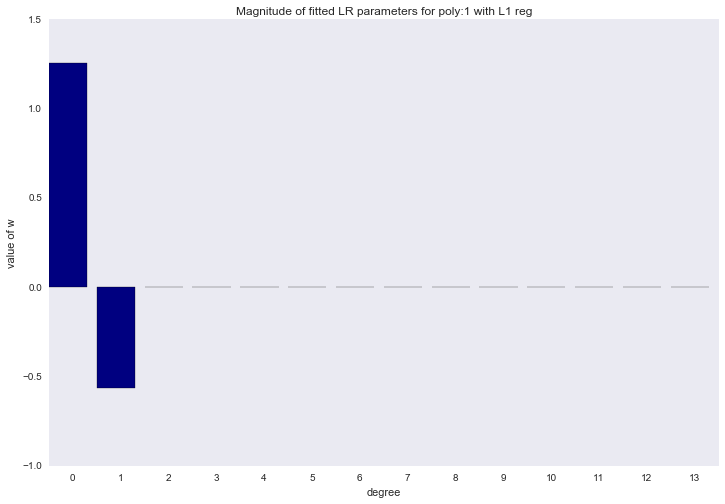

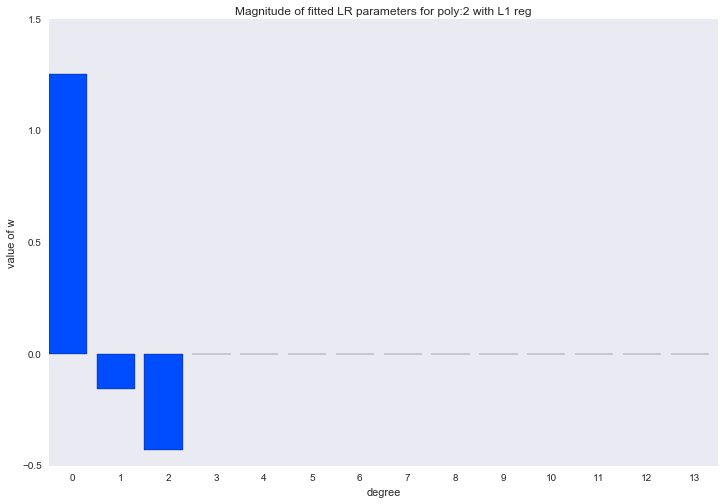

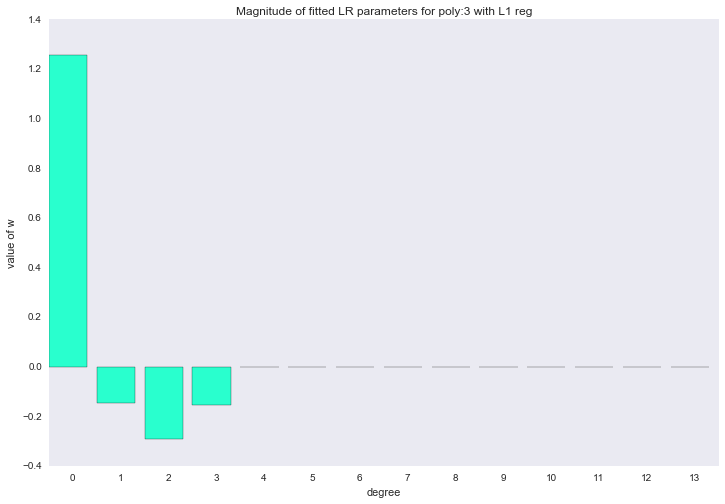

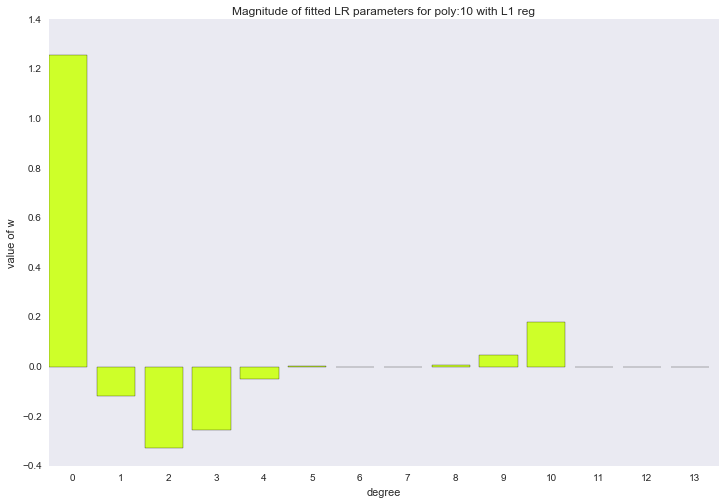

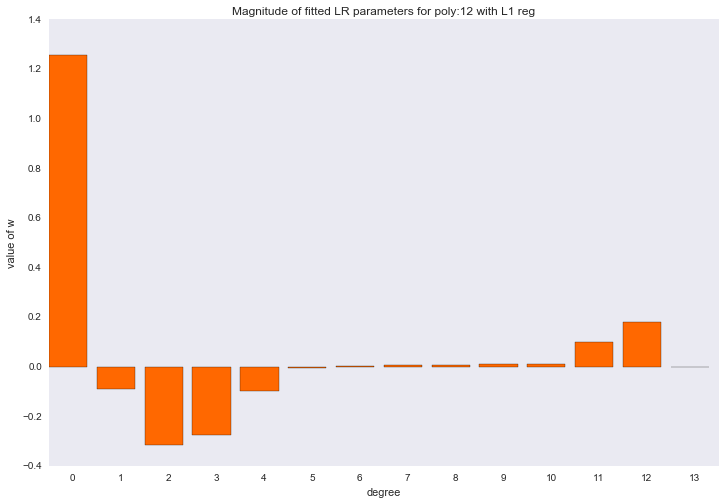

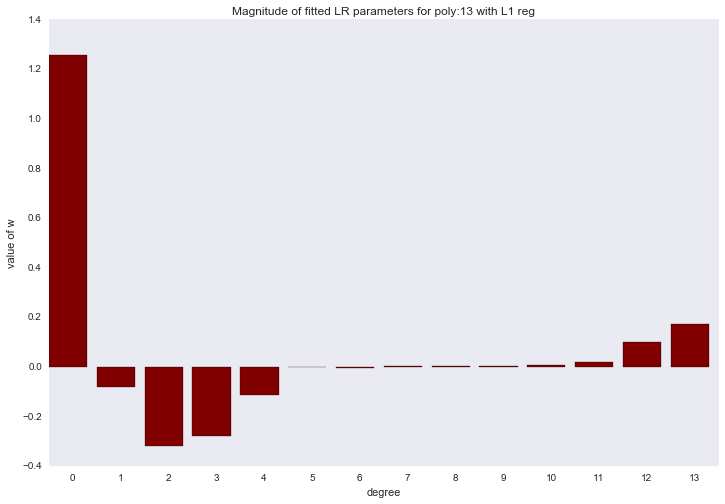

In [19]:
for ix, t in enumerate(w_list_l1):
    degree, w = t
    fig, ax = plt.subplots()
    plt.bar(range(max(degree_list) + 1), np.hstack((w, [0]*(max(degree_list) - w.shape[0] + 1))), color=colors[ix])
    plt.title('Magnitude of fitted LR parameters for poly:%i with L1 reg' % degree)
    plt.xlabel('degree')
    plt.ylabel('value of w')
    ax.set_xticks(np.array(range(max(degree_list) + 1)) + 0.5)
    ax.set_xticklabels(range(max(degree_list) + 1))
    plt.show()

Большая часть коэффициентов модели с L1 регуляризацией близка к нулю

![mlvd](images/plots/lr_polyfeat_coeffs_p12_l1.png)

# Метод максимального правдоподобия
Почему мы минимизируем среднеквадратичную ошибку, а не что-то другое.
Будем считать, что целевая переменная подчиняется следующему закону:

$$\large \vec{y}=X\vec{w} + \epsilon, \epsilon \sim \mathcal{N}\left(0, \sigma^2\right)$$

, где
* $\epsilon$ - случайная переменная, соответствующая случайной, непрогнозируемой ошибке модели.
Тогда вероятность пронаблюдать значение целевой переменной $\large y_i$ запишется как:
$$\large \begin{array}{rcl}p(y_i\mid X, \vec{w}) &=& \sum_{j=1}^{m}w_jX_{ij} + \mathcal{N}\left(0, \sigma^2\right) \\
&=& \mathcal{N}\left(\sum_{j=1}^{m}w_jX_{ij}, \sigma^2\right)
\end{array}$$

Мы хотим найти гипотезу максимального правдоподобия, т.е. нам нужно максимизировать выражение $p(y_i \mid X, \vec{w})$.
Также примем, что примеры берутся независимо,
тогда полное правдоподобие данных будет выглядеть как произведение функций плотности $p(y_i)$.

Рассмотрим логарифм правдоподобия (т.к. максимизация функции по параметру это то же самое, что и максимизация её логарифма по этому же параметру), что позволит нам перейти от произведения к сумме:

$$\large \begin{array}{rcl}\log p\left(\vec{y} \mid X, \vec{w}\right) &=& \log\prod_{i=n}^{n}\mathcal{N}\left(\sum_{j=1}^{m}w_jX_{ij}, \sigma^2\right) \\
&=& \sum_{i=1}^n\log\mathcal{N}\left(\sum_{j=1}^{m}w_jX_{ij}, \sigma^2\right) \\
&=& -\frac{n}{2}\log2\pi\sigma^2 - \frac{1}{2\sigma^2}\sum_{i=1}^n\left(y_i - \vec{w}^T\vec{x}_i\right)^2
\end{array}$$

$$\large \begin{array}{rcl}\hat{w} &=&\arg\max_wp(y_i, X, \vec{w}) \\
&=& \arg\max_{w}-\frac{n}{2}\log2\pi\sigma^2 - \frac{1}{2\sigma^2}\sum_{i=1}^n\left(y_i - \vec{w}^T\vec{x}_i\right)^2 \\
&=&\arg\max_{w}- \frac{1}{2\sigma^2}\sum_{i=1}^n\left(y_i - \vec{w}^T\vec{x}_i\right)^2 \\
&=&\arg\max_{w}- \mathcal{L}\left(X, \vec{y}, \vec{w}\right)
\end{array}$$

максимизация правдоподобия данных – это то же самое, что и минимизация среднеквадратичной ошибки*